## Hierarchical Clustering (with cutoff)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import json

In [3]:
CVD= ['CVA','IHD','CM','ARR','VD','CHD']
clrs  = ['navy','green','firebrick',\
         'mediumslateblue','darkgoldenrod', 'deepskyblue']
def rearrang(olddf):
    col = ['CVA','IHD','CM','ARR','VD','CHD']
    newdf = pd.DataFrame()
    for t in col:
        newdf[t]= olddf[t]
    return newdf

In [4]:
with open('../../1.DATA/uniprot/protein2uniprot.json', 'r') as f:
    protein2uniprot = json.load(f)
print('all data:',len(protein2uniprot))

all data: 2869


In [5]:
data = pd.read_csv('../../1.DATA/score/score.csv')
data = data.set_index('Protein')
ndf = rearrang(data)
ndf.head(2)

,CVA,IHD,CM,ARR,VD,CHD
Protein,,,,,,
small_ubiquitin-related_modifier_1,0.041144,0.012216,0.078019,0.000000,0.000000,0.024314
metalloproteinase_inhibitor_4,0.042887,0.054740,0.095265,0.045032,0.034227,0.005072


In [6]:
ndf.shape

(2869, 6)

In [7]:
ndata = ndf.copy(deep = True)
ndf.describe()

,CVA,IHD,CM,ARR,VD,CHD
count,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000
mean,0.040107,0.034860,0.026862,0.010698,0.007240,0.011746
std,0.060346,0.050428,0.038751,0.028798,0.024030,0.032627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.022209,0.018526,0.013534,0.000000,0.000000,0.000000
75%,0.057229,0.045417,0.037451,0.007516,0.000000,0.009734
max,0.686945,0.419997,0.343774,0.305472,0.365424,0.595544


#### Set Cutoff

In [8]:
solid_cutoff = [0.15,0.15,0.15,0.15,0.15,0.15]

In [9]:
mdata = ndata.copy(deep =True)

In [10]:
dis = ['CVA','IHD','CM','ARR','VD','CHD']
idx = list(mdata.index)
data_dict = []

for item in idx:
    data = mdata.loc[item,:]
    lst =[data[0],data[1],data[2],data[3],data[4],data[5]]
    m = max(lst)
    for e,cut in zip(lst,solid_cutoff):
        if e == m:
            if e > cut:
                    data_dict.append({'protein':item,\
                     'CVA':data[0],\
                     'IHD':data[1],\
                     'CM':data[2],\
                     'ARR': data[3],\
                     'VD':data[4],\
                     'CHD':data[5]})


In [11]:
cdata = pd.DataFrame(data_dict)
cdata.index = cdata['protein']
cdata = cdata.drop('protein', axis =1)

In [14]:
cdata.shape

(313, 6)

#### Clustering

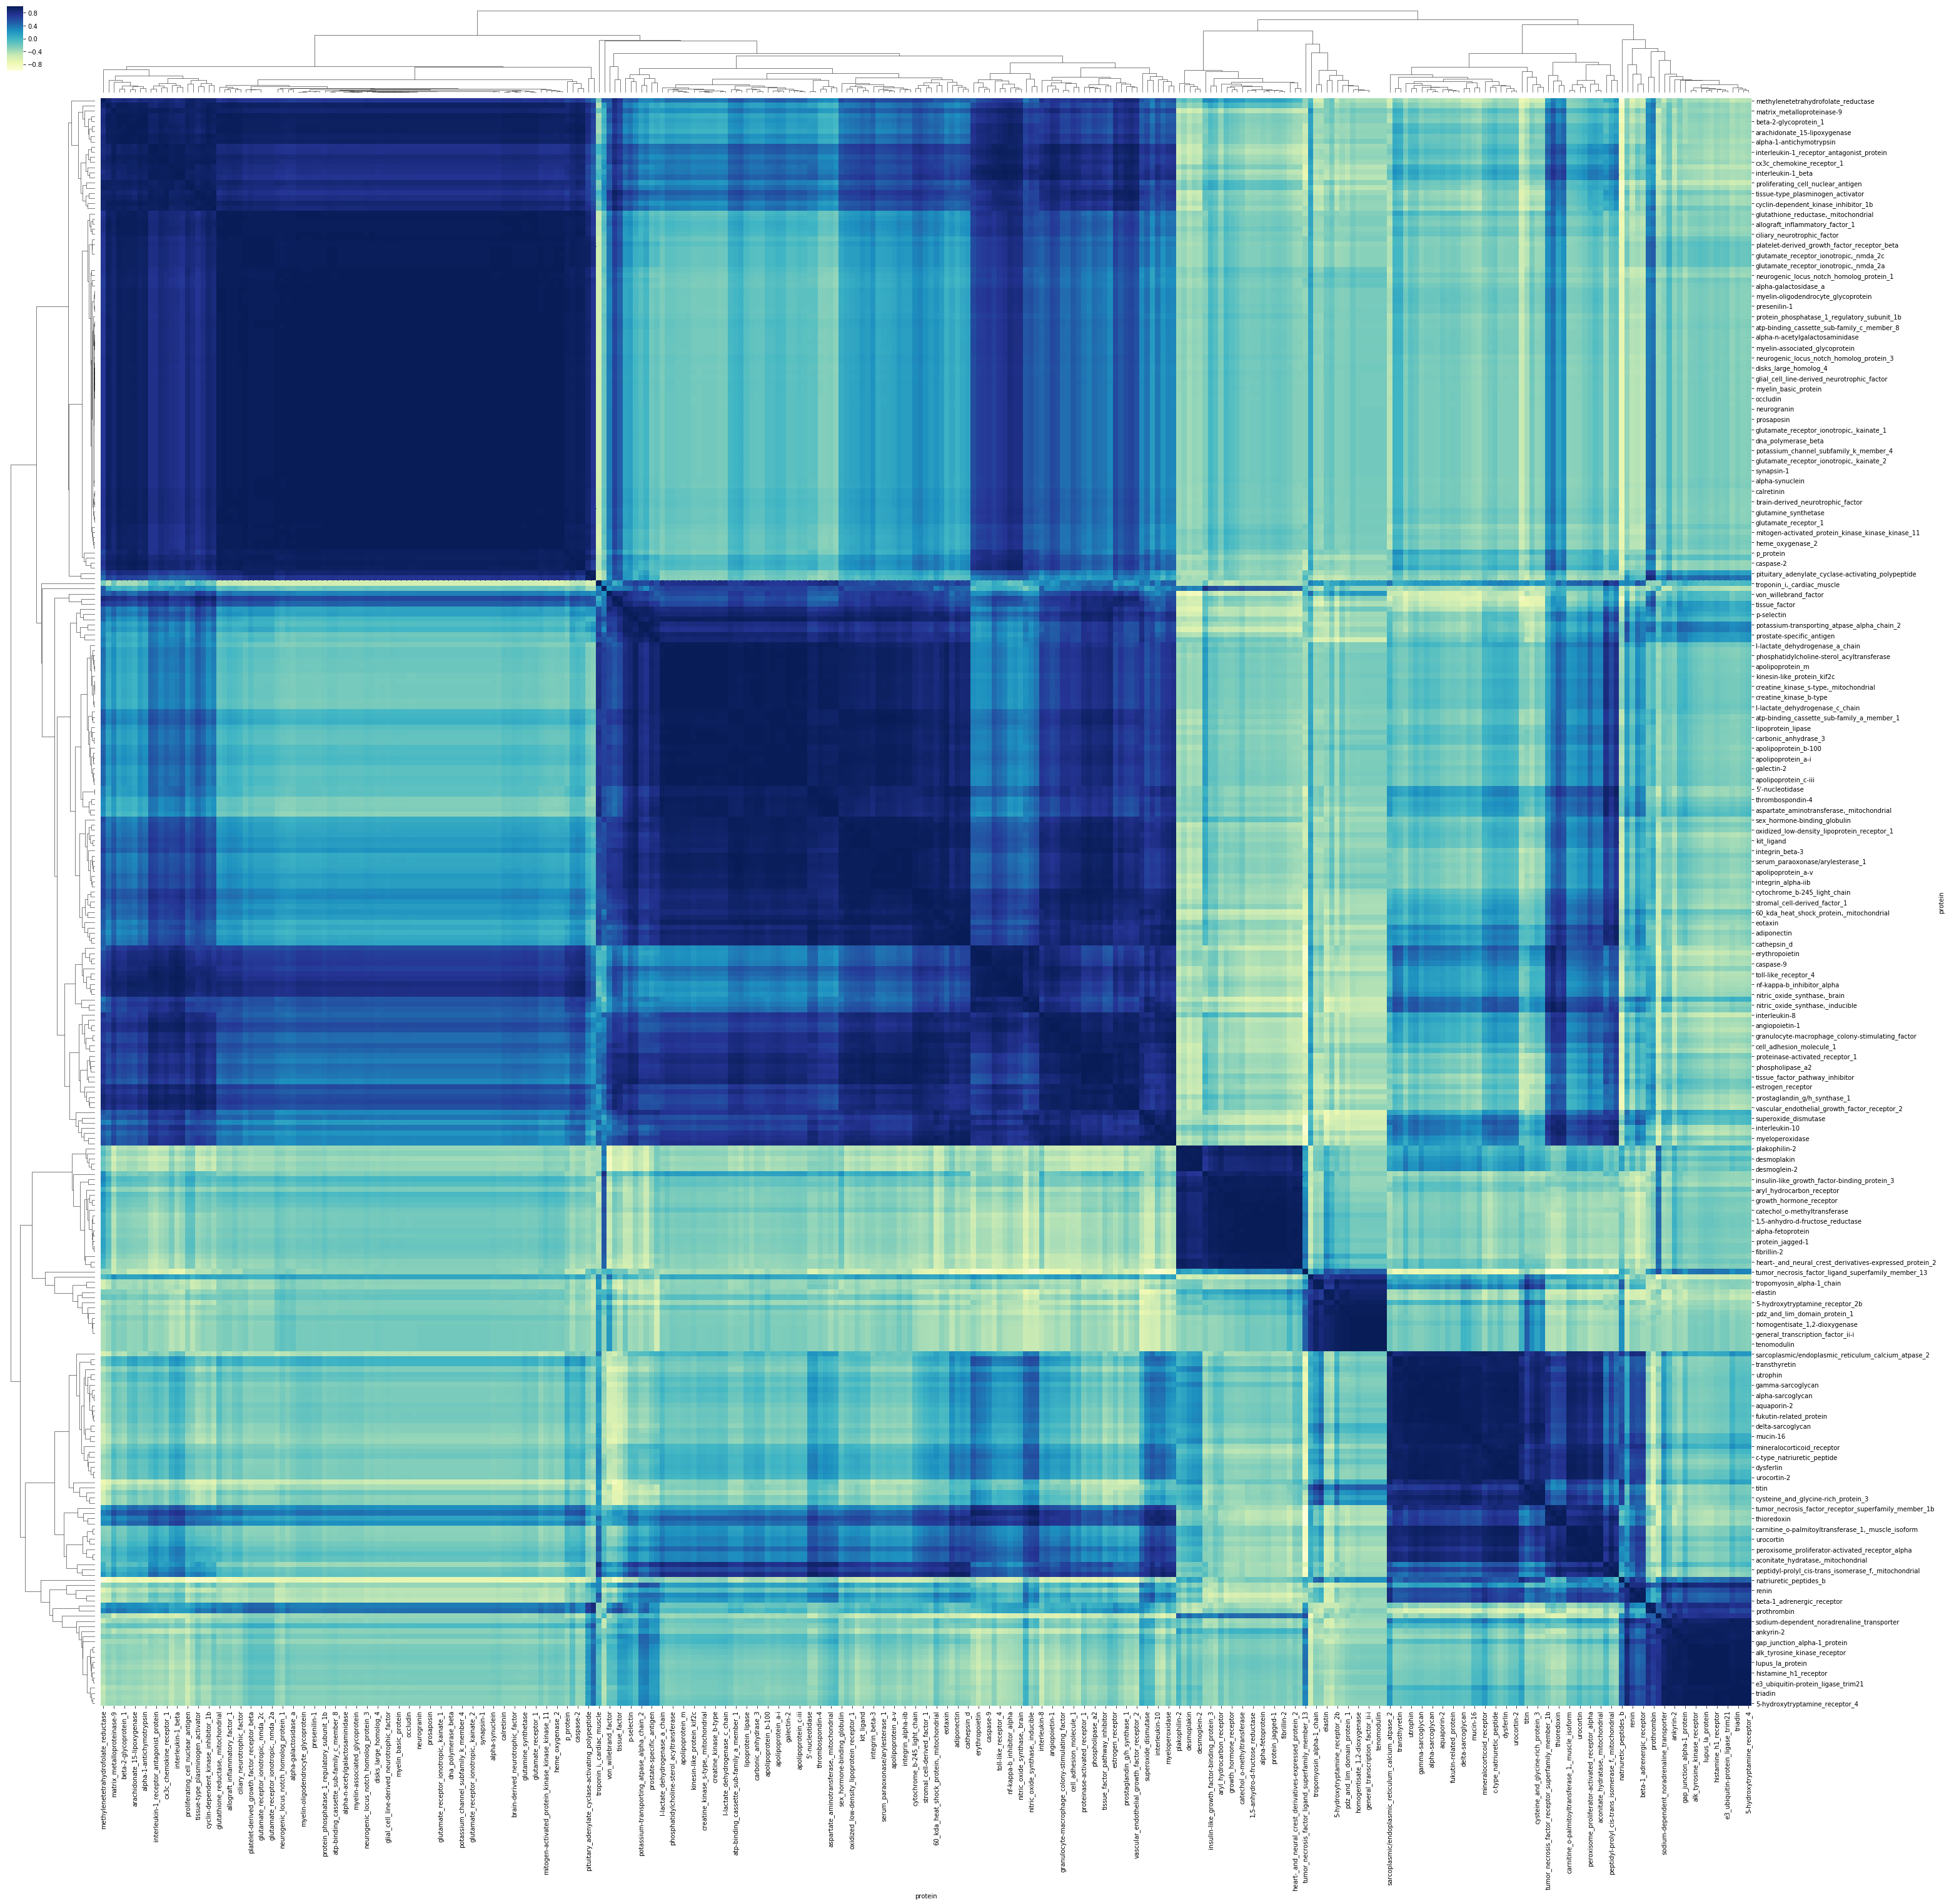

In [15]:
size=(50,50)
g = sns.clustermap(cdata.T.corr(),\
                   figsize=size,\
                   cmap = "YlGnBu",\
                   metric='seuclidean')



g.savefig('cutoff/cluster-cutoff-solid.pdf', format='pdf', dpi=400)

indx = g.dendrogram_row.reordered_ind

In [16]:
protein_cluster = []
for num in indx:
    for i,ndx in enumerate(cdata.index):
         if num == i:
                #print(i+1,ndx)
                protein_cluster.append({'id':i,"protein": ndx,\
                                        'ARR' : list(cdata.loc[ndx,:])[0],\
                                        'CHD':  list(cdata.loc[ndx,:])[1],\
                                        'CM' : list(cdata.loc[ndx,:])[2],\
                                        'CVA' : list(cdata.loc[ndx,:])[3],\
                                        'IHD' : list(cdata.loc[ndx,:])[4],\
                                        'VD' : list(cdata.loc[ndx,:])[5]})
                

In [17]:
protein_cluster_df = pd.DataFrame(protein_cluster)
protein_cluster_df = protein_cluster_df.set_index('protein')
protein_cluster_df = rearrang(protein_cluster_df)

In [18]:
protein_cluster_df.head(3)

,CVA,IHD,CM,ARR,VD,CHD
protein,,,,,,
methylenetetrahydrofolate_reductase,0.222450,0.155409,0.000390,0.005741,0.005021,0.100177
coagulation_factor_xii,0.167927,0.052323,0.000000,0.004614,0.000000,0.028020
matrix_metalloproteinase-9,0.245860,0.132204,0.072137,0.043005,0.061532,0.022252


#### Heatmap

In [19]:
protein_cluster_df.max()

CVA    0.686945
IHD    0.419997
CM     0.343774
ARR    0.305472
VD     0.365424
CHD    0.595544
dtype: float64

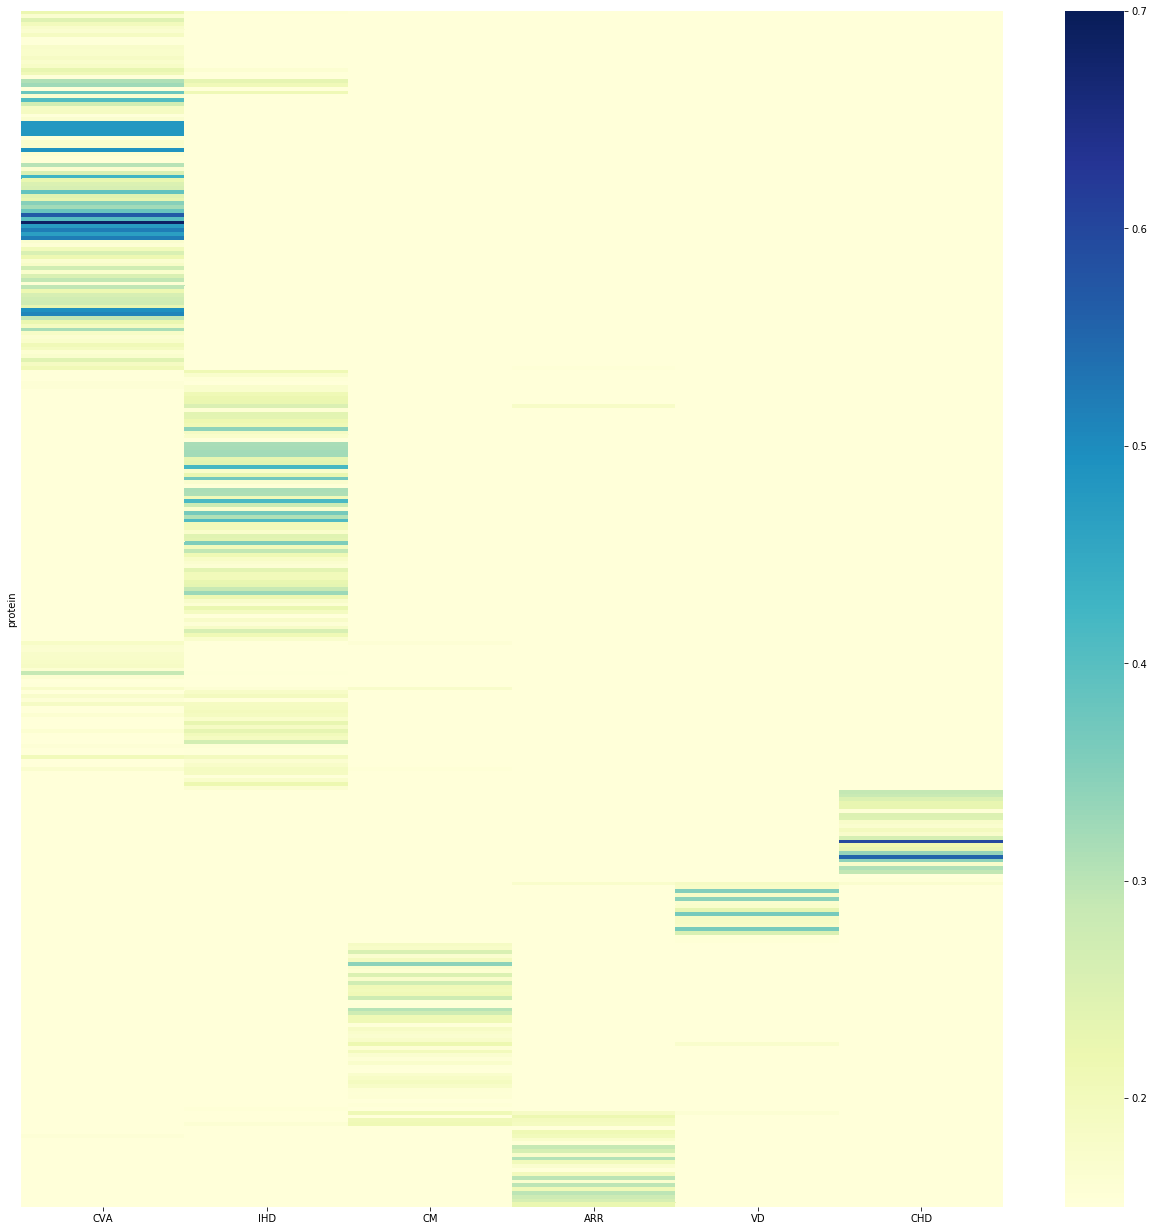

In [20]:
plt.figure(figsize = [22,22])
sns.heatmap(protein_cluster_df,\
            cmap="YlGnBu",\
            #cmap = sns.cubehelix_palette(1000),\
            #cmap = sns.cubehelix_palette(8, start=.5, rot=-.75),\
            #cmap = sns.color_palette("Blues"),\
            yticklabels=False,\
            vmin = 0.15,vmax = 0.70)
plt.savefig('cutoff/heatmap-cutoff-solid.pdf')

#### Barplot

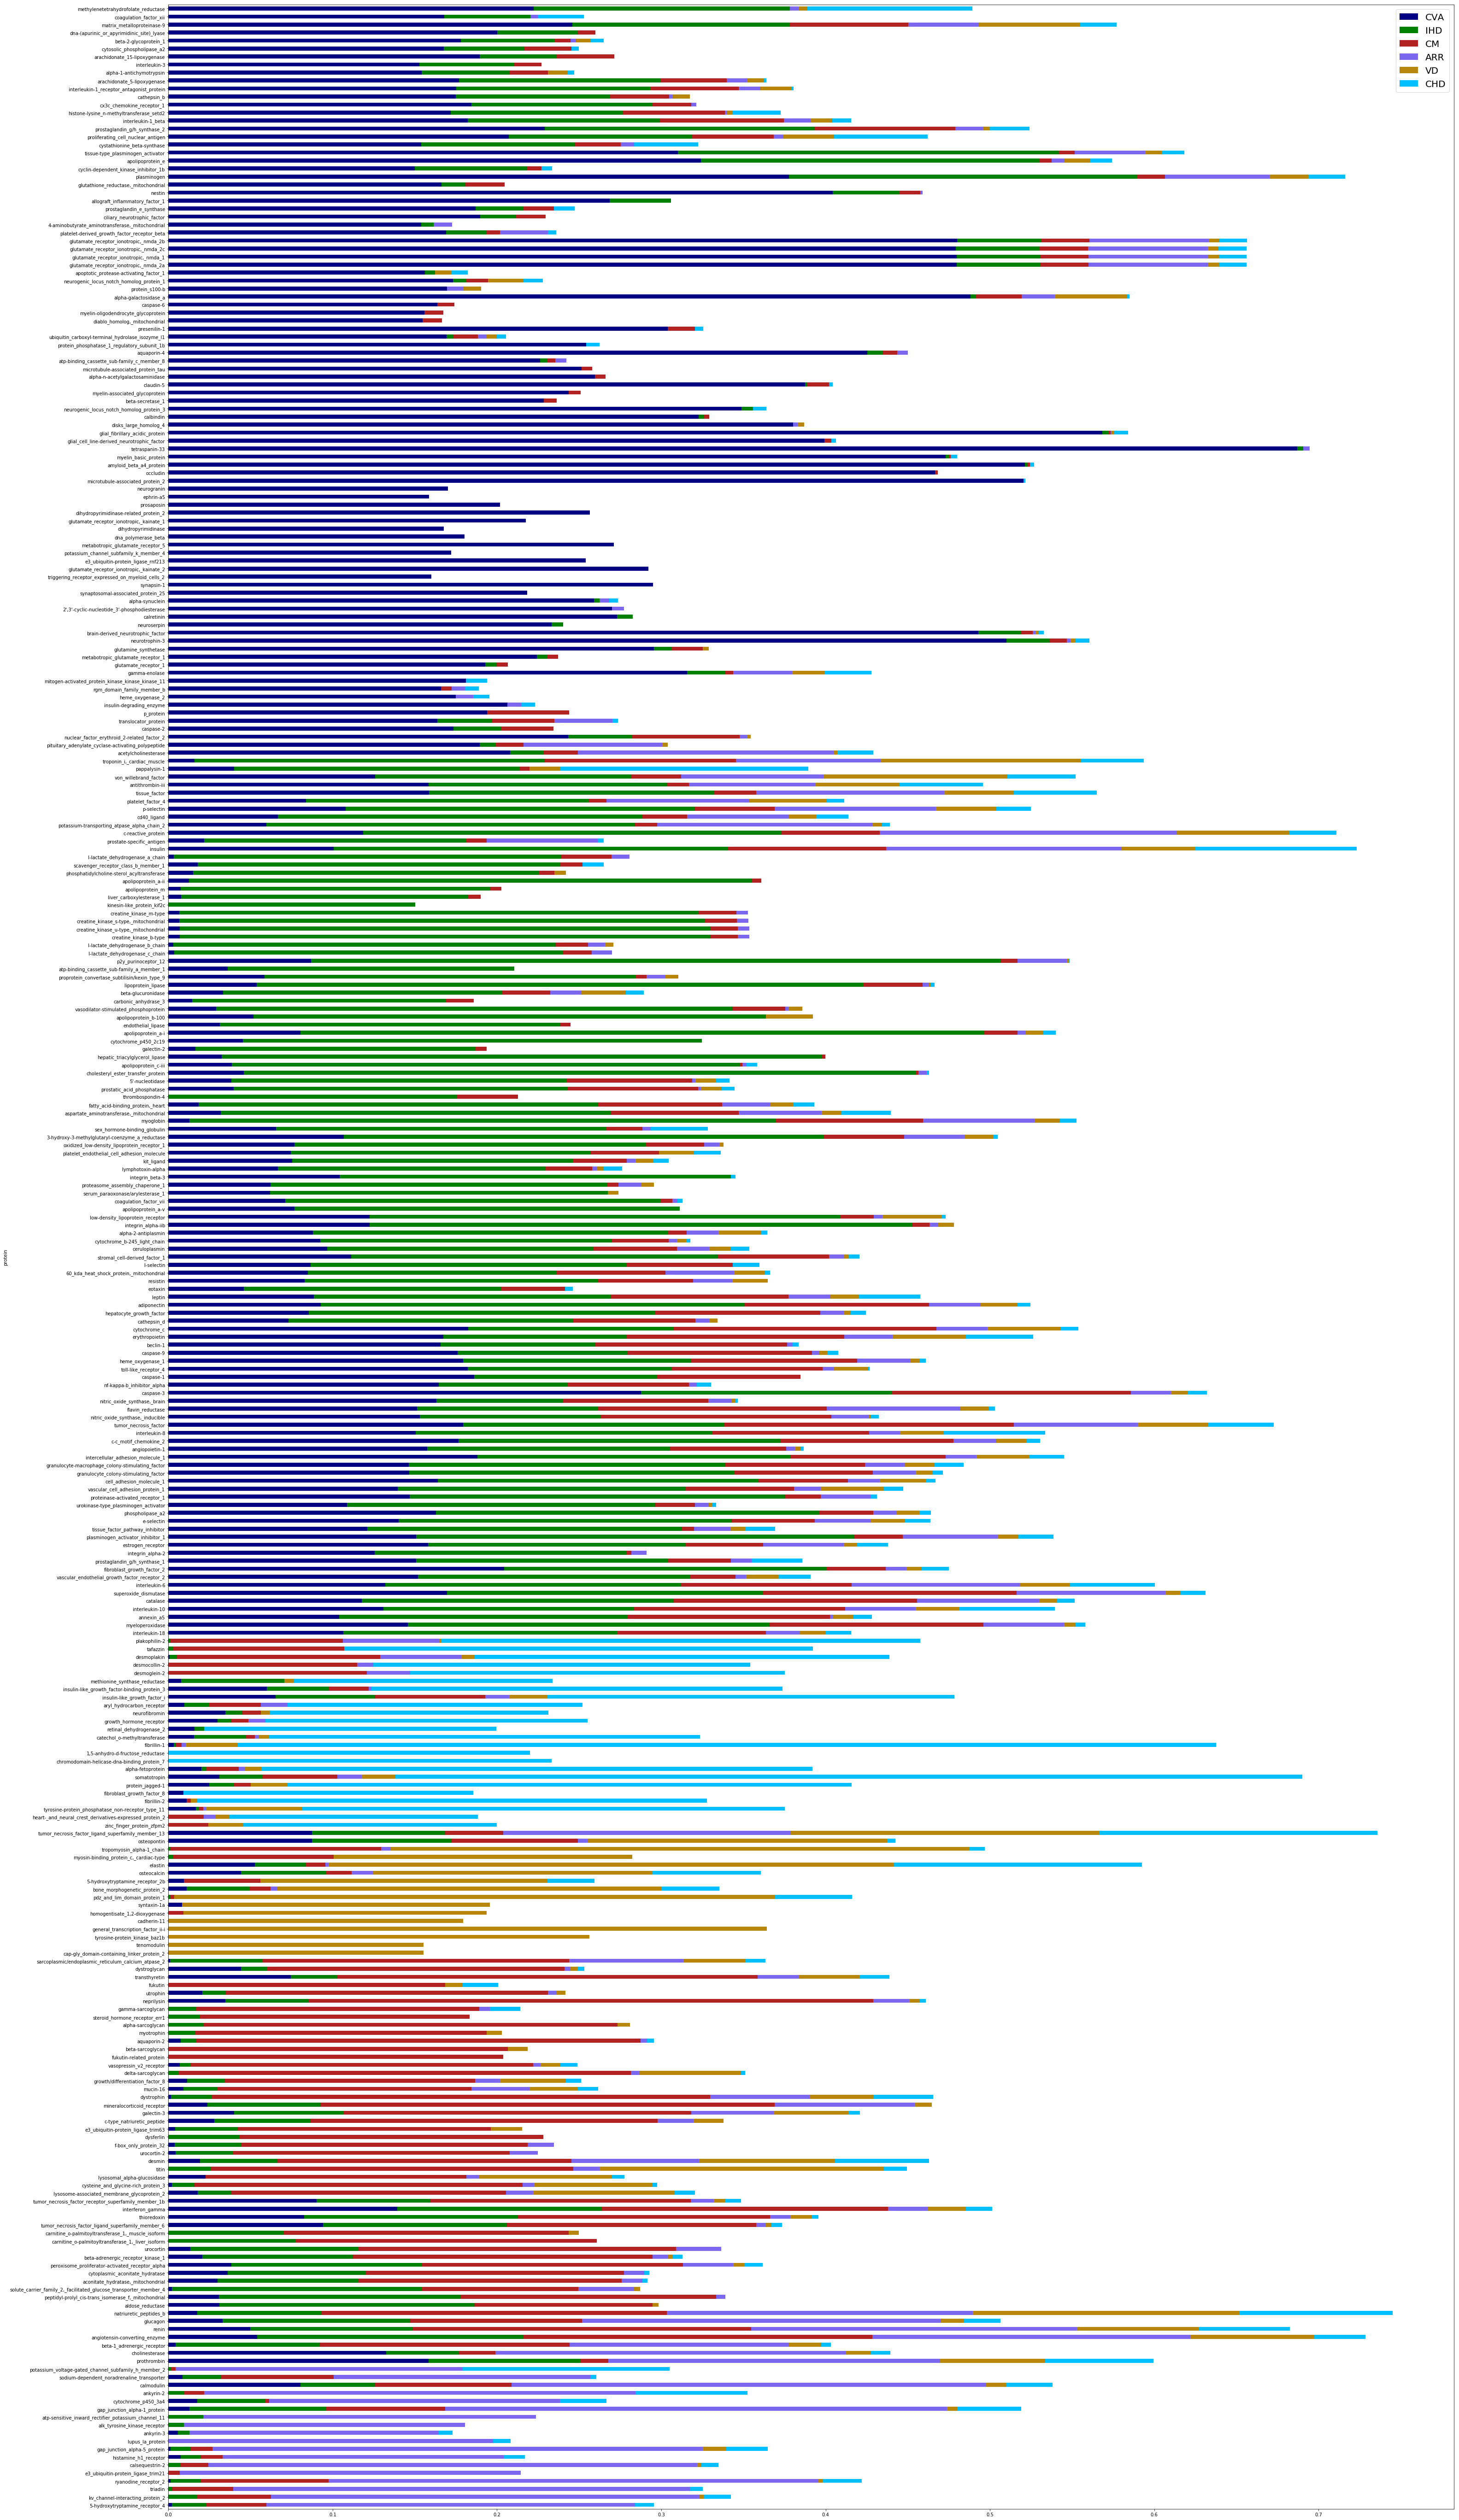

In [21]:
protein_cluster_df.plot.barh(stacked=True,figsize=(50,100),color =clrs)
plt.gca().invert_yaxis()
plt.legend(fontsize =20)
plt.savefig('cutoff/barplot-cutoff-solid.pdf')

### Final Result

In [22]:
U = []
index = list(protein_cluster_df.index)
for p in index:
    u = protein2uniprot[p]
    U.append(u)
protein_cluster_df['uniprot'] = U
protein_cluster_df.to_csv('cutoff/cluster-list-cutoff-solid.csv')